# Welcome

In this task, you are asked to implement kind of a Bayesian Logistic Regression by using Doubly Stochastic Variational Inference. 

The final goal is to be able to answer the question: is it a cat or a dog? 

<img src='img_for_task/intro.png'  width="40%" height="40%">

Hence, we will use the dataset with grey images of cats and dogs. Please, download it from this <a href="https://drive.google.com/file/d/12ed4i7iJduw-l2Jks7wsjldBK_SMyxdb/view?usp=sharing">link</a>.

#### Links of problems:
[Problem 1](#problem1) 1 point

[Problem 2](#problem2) 2 point

[Problem 3](#problem3) 4 points 

[Problem 4](#problem4) 1 point

[Problem 5](#problem5) 2 points

------ Total : 10 points  -------

Points for canvas: Total * 8

### Model

Consider dataset

$$
\begin{aligned}
& \{(x_n, y_n)\}_{n=1}^{N} \\
& x_n\in\mathbb{R}^{D\times D} \text{ gray-scale $[0;1]$ image} \\
& y_n\in\{-1,+1\} \text{ labels}
\end{aligned}
$$

To model probability output we consider logistic model:

$$
\begin{aligned}
& p(y_n|x_n, W) = \sigma(y_n f(x_n; W)), f:\mathbb{R}^{D\times D}\to \mathbb{R} \\
& \sigma(x) = \frac{1}{1+\exp(-x)}
\end{aligned}
$$

Let's define forward model. We suggest to use the [2d separable convoliton](https://en.wikipedia.org/wiki/Separable_filter) for our gray-scale 2d image.


$$
\text{Block}_{i}(x_n, w_{i}^{c}) = \text{Tanh} \odot [x_n * (w_{i1}^{c}w_{i2}^{c T})]
$$

Also, we consider final layer:

$$
\text{F}(X) = w_{f1}^TXw_{f2}
$$

We put independent normal prior with variance $\alpha_i^{-1}$ on each weight, hence, on the whole we obtain multivariate normal with diagonal matrix.

$$
p(W)=\mathcal{N}(W|0,A^{-1})
$$

Hence, our one-block model is:

$$
p(y,W|x,A) = \left[\prod\limits_{n=1}^{N}\sigma(y_n w_{f1}^T\left\{\text{Tanh} \odot [x_n * (w_{11}^{c}w_{12}^{c T})] \right\}w_{f2})\right]\mathcal{N}(W|0,A^{-1})
$$


And we want to optimise over log-evidence of the model by optimising ELBO with variational distribution $q$.

$$
\mathcal{L}[q, A] = \int q(W)\log\frac{p(y,W|x,A)}{q(W)}dW
$$

Let's make the following assumptions:

$$
\begin{aligned}
& q(W) = \mathcal{N}(W|m,S) \\
\end{aligned}
$$

<a id='problem1'></a>
#### Problem 1 (1 point)
1. Derive the equation for $\mathcal{L}[m, S, A]$, take all expectations that can be taken analytically.
2. From first order condition find optimal $\alpha^{i}$.
3. Derive the equation for $\mathcal{L}[m, S]$ by plugin optimal $A$. 

1. $$
\mathcal{L}[q, A] = \int \mathcal{N}(W|m,S)\log\frac{p(y,W|x,A)}{\mathcal{N}(W|m,S)}dW
$$

$$ F(W) = \left[\prod\limits_{n=1}^{N}\sigma(y_n w_{f1}^T\left\{\text{Tanh} \odot [x_n * (w_{11}^{c}w_{12}^{c T})] \right\}w_{f2})\right] $$

$$
\mathcal{L}[q, A] = \int \mathcal{N}(W|m,S)\log\frac{p(y,W|x,A)}{\mathcal{N}(W|m,S)}dW = \int \mathcal{N}(W|m,S)\log\frac{\mathcal{N}(W|0,A^{-1})}{\mathcal{N}(W|m,S)}dW + \int \mathcal{N}(W|m,S)\log F(W) dW =
$$

$$
= -KL(\mathcal{N}(W|m,S)|\mathcal{N}(W|0,A^{-1}))+ \int q(W)\log F(W) dW
$$
d - number of weights
$$
KL(\mathcal{N}(W|m,S)|\mathcal{N}(W|0,A^{-1})) = \frac{1}{2}\left[\log\frac{|A^{-1}|}{|S|}+tr(AS)+m^T A m - d\right]
$$

$$
\mathcal{L}[q, A] = \frac{1}{2}\left[\log{|A||S|}-\sum_{i=1}^{d}\alpha_i (s_{ii}+m_i^2) + d\right] + \int \mathcal{N}(W|m,S)\log F(W) dW = \frac{1}{2}\left[\log{|S|}+\sum_{i=1}^{d}\log{\alpha_i}-\sum_{i=1}^{d}\alpha_i (s_{ii}+m_i^2) + d\right] + \int \mathcal{N}(W|m,S)\log F(W) dW
$$

2. $$ \frac{\partial \mathcal{L}}{\partial \alpha_i} = \frac{1}{2} \left(\frac{1}{\alpha_i} -  (s_{ii}+m_i^2)\right) = 0
$$

$$
\alpha_i = \frac{1}{s_{ii}+m_i^2}
$$

3. $$ \mathcal{L}[m, S] = \frac{1}{2}\left[\log{|S|}-\sum_{i=1}^{d}\log{(s_{ii}+m_i^2)}-\sum_{i=1}^{d}\frac{s_{ii}+m_i^2}{s_{ii}+m_i^2}  + d\right] + \int \mathcal{N}(W|m,S)\log F(W) dW
$$
$$
\mathcal{L}[m, S] = \frac{1}{2}\left[\log{|S|}-\sum_{i=1}^{d}\log{(s_{ii}+m_i^2)}\right] + \int \mathcal{N}(W|m,S)\log F(W) dW
$$

Let's matrix $S$ also be diagonal.

<a id='problem2'></a>
#### Problem 2, 2 point
1. Simplify all terms (log-determinants, .etc) of the $\mathcal{L}$ by using $q(W)$ with diagonal $S$.
2. Derive the equation for reparametrization trick, hence, all expectations should be taken with respect to the standard normal distribution. ????

1. $$ 
\mathcal{L}[m, S] = \frac{1}{2}\left[\log{|S|}-\sum_{i=1}^{d}\log{(s_{ii}+m_i^2)}\right] + \int \mathcal{N}(W|m,S)\log F(W) dW =$$
$$ = \frac{1}{2}\left[\sum_{i=1}^{d}\log\frac{s_{ii}}{(s_{ii}+m_i^2)}\right] + \frac{1}{\sqrt{(2\pi)^d \prod_{i=1}^{d}s_{ii}}}  \int \exp \left(-\sum_{i=1}^{d}\frac{(w_i-m_i)^2}{2 s_{ii}}\right) \log F(W) dW
$$
2. K - number of weights' samples for Monte-Carlo integral estimation. $W_k \sim  \mathcal{N}(W|m,S)$.
$$\hat{\mathcal{L}}[m, S, K] = \frac{1}{2}\left[\sum_{i=1}^{d}\log\frac{s_{ii}}{(s_{ii}+m_i^2)}\right] +  \frac{1}{K}\sum_{k=1}^{K} \log F(W_k) 
$$
Using Pytorch Autograd it is possible to re-estimate parameters $S$ and $m$ of weigth distribution.

<a id='problem3'></a>
#### Problem 3, 4 points
Define and implement model, you could choose the number of the internal blocks by your own.
Optimise model using Doubly Stochastic Variational Inference (samples from dataset and samples to estimate expectation with re-parametrization trick). During optimization, estimate and save values of the ELBO.
You should use PyTorch. 

Don't for get to return not only optimal parametrs for $q$ but also estimate optimal $A$ from them!

In [2]:
import numpy as np
import torch
from matplotlib import pyplot as plt
from torch.nn import functional as F
from torch.optim import Adam
from google.colab import drive
from google.colab import files
from torch.distributions.multivariate_normal import MultivariateNormal
drive.mount('/content/gdrive')
%matplotlib inline

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
torch.cuda.is_available()
torch.cuda.empty_cache()

In [0]:
device = torch.device('cuda')
torch.set_default_tensor_type(torch.cuda.DoubleTensor)
torch.cuda.set_device(0)

In [5]:
torch.cuda.current_device()

0

In [0]:
train_data = np.load('/content/gdrive/My Drive/HW2_BMML/train_images.npy')
train_labels = np.load('/content/gdrive/My Drive/HW2_BMML/train_labels.npy')

In [0]:
train_data=torch.tensor(train_data, device=device)

In [0]:
dogs_ind = np.where(train_labels=='dog')
cats_ind = np.where(train_labels=='cat')
train_labels[dogs_ind] = 1
train_labels[cats_ind] = -1
train_labels = train_labels.astype(int)

In [0]:
train_labels=torch.tensor(train_labels, device=device)

In [0]:
class Model:
    def __init__(self, smpl_w, smpl_d, dim):#num of samples of weight and data per iteration, 
        self.smpl_w = smpl_w                 #dim - number of weights component
        self.smpl_d = smpl_d
        self.dim = dim
        
        self.S = torch.ones(dim, requires_grad=True)
        self.m = torch.zeros(dim, requires_grad=True)
        self.A = 1/(self.S+self.m**2)
        self.ELBO_mean = []
        self.optimizer = Adam([self.m, self.S], lr=0.01)
        self.dist = MultivariateNormal(self.m, torch.diag(self.S))
    
    def generate_weihgts(self):
        w = self.dist.sample()
        w_c1 = w[0:3]
        w_c2 = w[3:6]
        w_f1 = w[6:304]
        w_f2 = w[304:]
        return w_c1, w_c2, w_f1, w_f2
    
    def get_conv(self, filt, data, labels):
        x = F.conv2d(data.reshape(self.smpl_d, 1, 300, 300), filt.reshape(1, 1, 3, 3))
        tanh_x = torch.tanh(x)
        return tanh_x
        
    def int_log(self, data, labels):
        integral = torch.tensor(0)
        for i in range(self.smpl_w):
            w_c1, w_c2, w_f1, w_f2 = self.generate_weihgts()
            filters = torch.mm(w_c1.view([-1, 1]), w_c2.view([1, -1]))
            log_F = torch.tensor(0)
            x_conv = self.get_conv(filters, data, labels)
            for j in range(self.smpl_d):
                x = x_conv[j].view(298, 298)
                y = torch.sigmoid(labels[j]*torch.mm(w_f1.view([1, -1]), torch.mm(x,w_f2.view([-1, 1]))))
                log_F = log_F - self.dist.log_prob(y)
            integral = integral + log_F
        return integral/self.smpl_w
    
    def get_ELBO(self, data, labels):
        elbo = -torch.log(self.S/(self.S+self.m**2)).sum()/torch.tensor(2) + self.int_log(data, labels) 
        return elbo
    
    def update_A(self):
        self.A = 1/(self.S+self.m**2)
    
    def optimize(self, images, labels):
        for j in range(images.size()[0]//self.smpl_d):
            self.optimizer.zero_grad()
            elbo = self.get_ELBO(images[j*self.smpl_d:(j+1)*self.smpl_d], labels[j*self.smpl_d:(j+1)*self.smpl_d])
            elbo.backward(retain_graph=True)
            self.optimizer.step()
            
            self.update_A()
                
            print('+++++++++++++++', j+1, 'iteration +++++++')
            print('==ELBO_mean==', elbo.cpu().data.numpy())
            self.ELBO_mean.append(elbo.cpu().data.numpy())
        return self.ELBO_mean
    

In [0]:
model = Model(20, 100, 298*2+6)

In [64]:
ELBO_graph = model.optimize(train_data, train_labels)

+++++++++++++++ 1 iteration +++++++
==ELBO_mean== [70040.12204845]
+++++++++++++++ 2 iteration +++++++
==ELBO_mean== [69721.84002709]
+++++++++++++++ 3 iteration +++++++
==ELBO_mean== [70104.30913928]
+++++++++++++++ 4 iteration +++++++
==ELBO_mean== [69504.6993641]
+++++++++++++++ 5 iteration +++++++
==ELBO_mean== [69086.47767433]
+++++++++++++++ 6 iteration +++++++
==ELBO_mean== [68381.81117044]
+++++++++++++++ 7 iteration +++++++
==ELBO_mean== [68641.79199627]
+++++++++++++++ 8 iteration +++++++
==ELBO_mean== [68214.37763898]
+++++++++++++++ 9 iteration +++++++
==ELBO_mean== [67427.41857956]
+++++++++++++++ 10 iteration +++++++
==ELBO_mean== [68337.39466794]
+++++++++++++++ 11 iteration +++++++
==ELBO_mean== [67639.77801654]
+++++++++++++++ 12 iteration +++++++
==ELBO_mean== [67074.32019229]
+++++++++++++++ 13 iteration +++++++
==ELBO_mean== [67102.96198577]
+++++++++++++++ 14 iteration +++++++
==ELBO_mean== [66952.7320728]
+++++++++++++++ 15 iteration +++++++
==ELBO_mean== [66548.9

<a id='problem4'></a>
#### Problem 4, 1 point

1. Plot ELBO vs. iteration
2. Plot values of the optimal $A$ vs. index

Text(0.5, 1.0, 'Optimal A')

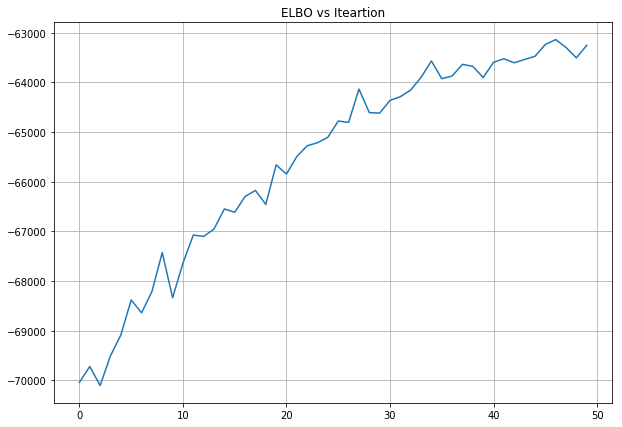

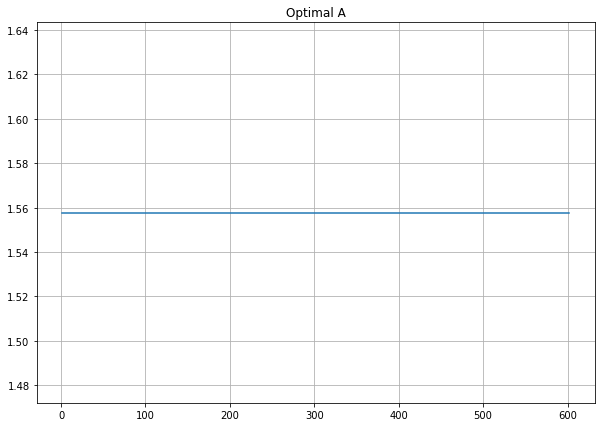

In [65]:
# your code here
plt.figure(figsize=(10,7))
plt.plot(range(0, 50), -np.array(ELBO_graph))
plt.grid(True)
plt.title('ELBO vs Iteartion')

plt.figure(figsize=(10,7))
plt.plot(range(1, 298*2+6+1), model.A.cpu().data.numpy())
plt.grid(True)
plt.title('Optimal A')

<a id='problem5'></a>
#### Problem 5, 2 points

Now, you need to implement the prediction function.
You need to make 2 modes for prediction: 

1. Soft-mode: $p(y_{\text{test}}=1|x_{\text{test}}) = \int F(x_n; W)q(W)dW$

To estimate value of the function use sampling.

2. Hard-mode: $p(y_{\text{test}}=1|x_{\text{test}}) = \int F(x_n; W)\delta(W-W^{MAP})dw$

Plot
1. 5 High confidence pictures of cats
2. 5 High confidence pictures of dogs
3. 5 Not sure what-it-is pictures

In [0]:
# your code here
S = model.S
m = model.m
dist = MultivariateNormal(m, torch.diag(S))

In [0]:
test_data = np.load('/content/gdrive/My Drive/HW2_BMML/test_images.npy')
test_labels = np.load('/content/gdrive/My Drive/HW2_BMML/test_labels.npy')
test_data = torch.tensor(test_data)

In [0]:
dogs_ind = np.where(test_labels=='dog')
cats_ind = np.where(test_labels=='cat')
test_labels[dogs_ind] = 1
test_labels[cats_ind] = -1
test_labels = test_labels.astype(int)

In [0]:
test_labels = torch.tensor(test_labels, device=device)

In [0]:
def soft_pred(label, q, image, smpl_w):
    proba = 0
    for i in range(smpl_w):
        w = q.sample()
        w_c1 = w[0:3]
        w_c2 = w[3:6]
        w_f1 = w[6:304]
        w_f2 = w[304:]
        filt = torch.mm(w_c1.view([-1, 1]), w_c2.view([1, -1]))
    
        x = F.conv2d(image.reshape(1, 1, 300, 300), filt.reshape(1, 1, 3, 3))
        x = x.view(298, 298)
        tanh_x = torch.tanh(x)
        y = torch.sigmoid(label*torch.mm(w_f1.view([1, -1]), torch.mm(x,w_f2.view([-1, 1]))))
        proba += y 
      
    return proba.cpu().data.numpy()/smpl_w

In [0]:
soft_proba_dog = []
soft_proba_cat = []
for i in range(test_labels.size()[0]):
  soft_proba_dog.append(soft_pred(1, dist, test_data[i], 20))
  soft_proba_cat.append(soft_pred(-1, dist, test_data[i], 20))

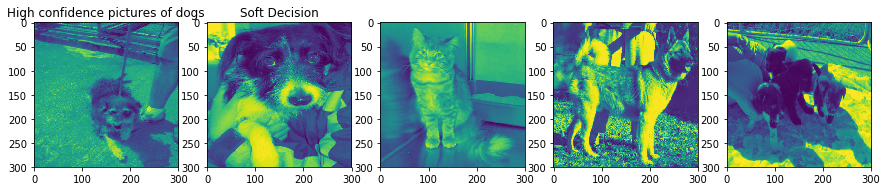

In [129]:
x=np.array(soft_proba_dog).reshape(5000,)
soft_proba_dog_ind = np.argsort(x)[5000-5:5000]
dogs_to_plot = test_data[soft_proba_dog_ind,:, :].reshape([5, 300, 300])
plt.figure(figsize=(15, 7))

plt.subplot(151)
plt.title('High confidence pictures of dogs')
plt.imshow(dogs_to_plot[0].cpu().data.numpy())
plt.subplot(152)
plt.title('Soft Decision')
plt.imshow(dogs_to_plot[1].cpu().data.numpy())
plt.subplot(153)
plt.imshow(dogs_to_plot[2].cpu().data.numpy())
plt.subplot(154)
plt.imshow(dogs_to_plot[3].cpu().data.numpy())
plt.subplot(155)
plt.imshow(dogs_to_plot[4].cpu().data.numpy());


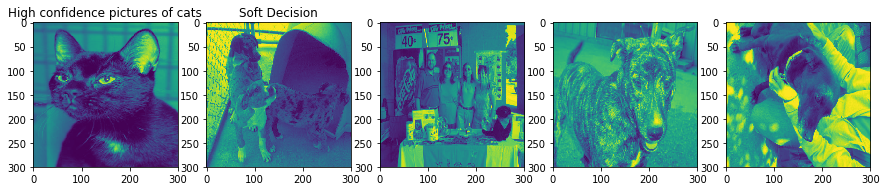

In [130]:
x=np.array(soft_proba_cat).reshape(5000,)
soft_proba_cat_ind = np.argsort(x)[5000-5:5000]
cats_to_plot = test_data[soft_proba_cat_ind,:, :].reshape([5, 300, 300])
plt.figure(figsize=(15, 7))

plt.subplot(151)
plt.title('High confidence pictures of cats')
plt.imshow(cats_to_plot[0].cpu().data.numpy())
plt.subplot(152)
plt.title('Soft Decision')
plt.imshow(cats_to_plot[1].cpu().data.numpy())
plt.subplot(153)
plt.imshow(cats_to_plot[2].cpu().data.numpy())
plt.subplot(154)
plt.imshow(cats_to_plot[3].cpu().data.numpy())
plt.subplot(155)
plt.imshow(cats_to_plot[4].cpu().data.numpy());

In [0]:
def hard_pred(label, m, image):
    w = m
    w_c1 = w[0:3]
    w_c2 = w[3:6]
    w_f1 = w[6:304]
    w_f2 = w[304:]
    filt = torch.mm(w_c1.view([-1, 1]), w_c2.view([1, -1]))
    
    x = F.conv2d(image.reshape(1, 1, 300, 300), filt.reshape(1, 1, 3, 3))
    x = x.view(298, 298)
    tanh_x = torch.tanh(x)
    proba = torch.sigmoid(label*torch.mm(w_f1.view([1, -1]), torch.mm(x,w_f2.view([-1, 1]))))      
      
    return proba.cpu().data.numpy()

In [0]:
hard_proba_dog = []
hard_proba_cat = []
for i in range(test_labels.size()[0]):
  hard_proba_dog.append(hard_pred(1, m, test_data[i]))
  hard_proba_cat.append(hard_pred(-1, m, test_data[i]))

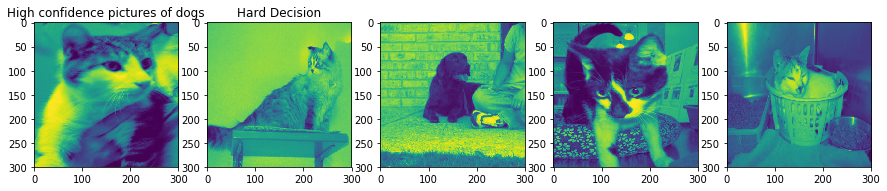

In [133]:
x=np.array(hard_proba_dog).reshape(5000,)
hard_proba_dog_ind = np.argsort(x)[5000-5:5000]
dogs_to_plot = test_data[hard_proba_dog_ind,:, :].reshape([5, 300, 300])
plt.figure(figsize=(15, 7))

plt.subplot(151)
plt.title('High confidence pictures of dogs')
plt.imshow(dogs_to_plot[0].cpu().data.numpy())
plt.subplot(152)
plt.title('Hard Decision')
plt.imshow(dogs_to_plot[1].cpu().data.numpy())
plt.subplot(153)
plt.imshow(dogs_to_plot[2].cpu().data.numpy())
plt.subplot(154)
plt.imshow(dogs_to_plot[3].cpu().data.numpy())
plt.subplot(155)
plt.imshow(dogs_to_plot[4].cpu().data.numpy());


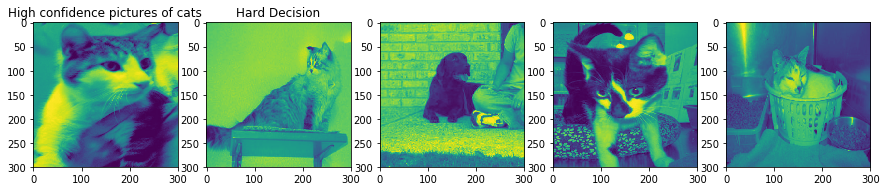

In [138]:
x=np.array(hard_proba_cat).reshape(5000,)
hard_proba_cat_ind = np.argsort(x)[5000-5:5000]
cats_to_plot = test_data[hard_proba_cat_ind,:, :].reshape([5, 300, 300])
plt.figure(figsize=(15, 7))

plt.subplot(151)
plt.title('High confidence pictures of cats')
plt.imshow(cats_to_plot[0].cpu().data.numpy())
plt.subplot(152)
plt.title('Hard Decision')
plt.imshow(cats_to_plot[1].cpu().data.numpy())
plt.subplot(153)
plt.imshow(cats_to_plot[2].cpu().data.numpy())
plt.subplot(154)
plt.imshow(cats_to_plot[3].cpu().data.numpy())
plt.subplot(155)
plt.imshow(cats_to_plot[4].cpu().data.numpy());

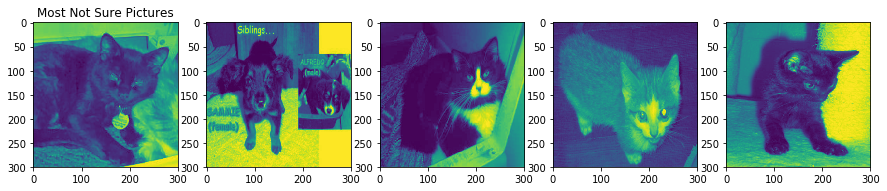

In [137]:
x=np.array(soft_proba_cat).reshape(5000,)
uncertain_cat_ind = np.argsort(np.abs(x-0.5))[:5]
cats_to_plot = test_data[uncertain_cat_ind,:, :].reshape([5, 300, 300])
plt.figure(figsize=(15, 7))

plt.subplot(151)
plt.title('Most Not Sure Pictures')
plt.imshow(cats_to_plot[0].cpu().data.numpy())
plt.subplot(152)
plt.imshow(cats_to_plot[1].cpu().data.numpy())
plt.subplot(153)
plt.imshow(cats_to_plot[2].cpu().data.numpy())
plt.subplot(154)
plt.imshow(cats_to_plot[3].cpu().data.numpy())
plt.subplot(155)
plt.imshow(cats_to_plot[4].cpu().data.numpy())